In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Kashif ahmad\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
transactions = pd.read_csv('transactions.csv')

In [3]:
products_data = {
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    'ProductName': ['ActiveWear Biography', 'ActiveWear Smartwatch', 'ComfortLiving Biography',
                    'BookWorld Rug', 'TechPro T-Shirt'],
    'Category': ['Books', 'Electronics', 'Books', 'Home Decor', 'Clothing'],
    'Price': [169.3, 346.3, 44.12, 95.69, 429.31]
}

In [4]:
products = pd.DataFrame(products_data)

In [5]:
customers_data = {
    'CustomerID': ['C0001', 'C0002', 'C0003', 'C0004', 'C0005'],
    'CustomerName': ['Lawrence Carroll', 'Elizabeth Lutz', 'Michael Rivera', 'Kathleen Rodriguez', 'Laura Weber'],
    'Region': ['South America', 'Asia', 'South America', 'South America', 'Asia'],
    'SignupDate': ['2022-07-10', '2022-02-13', '2024-03-07', '2022-10-09', '2022-08-15']
}

In [6]:
customers = pd.DataFrame(customers_data)

In [7]:
# Merge datasets
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

In [8]:
# Convert date columns to datetime
data_columns = ['TransactionDate', 'SignupDate']
for col in data_columns:
    merged_data[col] = pd.to_datetime(merged_data[col])

In [9]:
# Display basic info about the merged dataset
print("Merged Data Overview:\n", merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    2 non-null      object        
 1   CustomerID       2 non-null      object        
 2   ProductID        2 non-null      object        
 3   TransactionDate  2 non-null      datetime64[ns]
 4   Quantity         2 non-null      int64         
 5   TotalValue       2 non-null      float64       
 6   Price_x          2 non-null      float64       
 7   ProductName      2 non-null      object        
 8   Category         2 non-null      object        
 9   Price_y          2 non-null      float64       
 10  CustomerName     2 non-null      object        
 11  Region           2 non-null      object        
 12  SignupDate       2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 336.0+ bytes
Merged Data Overvi

# Exploratory Data Analysis
## Summary statistics


In [11]:
print("\nSummary Statistics:\n", merged_data.describe())


Summary Statistics:
            TransactionDate  Quantity   TotalValue    Price_x    Price_y  \
count                    2       2.0     2.000000    2.00000    2.00000   
mean   2024-07-18 21:26:36       4.0   883.980000  220.99500  220.99500   
min    2024-06-11 23:59:08       4.0   382.760000   95.69000   95.69000   
25%    2024-06-30 10:42:52       4.0   633.370000  158.34250  158.34250   
50%    2024-07-18 21:26:36       4.0   883.980000  220.99500  220.99500   
75%    2024-08-06 08:10:20       4.0  1134.590000  283.64750  283.64750   
max    2024-08-24 18:54:04       4.0  1385.200000  346.30000  346.30000   
std                    NaN       0.0   708.832122  177.20803  177.20803   

                SignupDate  
count                    2  
mean   2023-02-24 12:00:00  
min    2022-02-13 00:00:00  
25%    2022-08-20 06:00:00  
50%    2023-02-24 12:00:00  
75%    2023-08-31 18:00:00  
max    2024-03-07 00:00:00  
std                    NaN  


## Top-selling products


In [12]:
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print("\nTop-Selling Products:\n", top_products.head())


Top-Selling Products:
 ProductName
ActiveWear Smartwatch    4
BookWorld Rug            4
Name: Quantity, dtype: int64



## Revenue by region

In [13]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:\n", revenue_by_region)


Revenue by Region:
 Region
Asia              382.76
South America    1385.20
Name: TotalValue, dtype: float64


## Sales trends over time

In [14]:
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period('M')
sales_trend = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
print("\nSales Trend:\n", sales_trend)


Sales Trend:
 TransactionMonth
2024-06     382.76
2024-08    1385.20
Freq: M, Name: TotalValue, dtype: float64


# Visualization

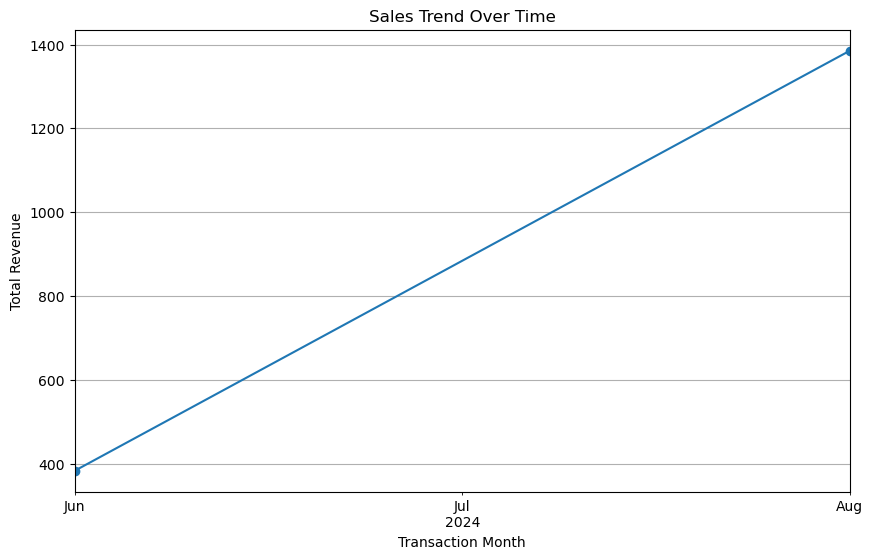

In [15]:
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='line', title='Sales Trend Over Time', marker='o')
plt.ylabel('Total Revenue')
plt.xlabel('Transaction Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

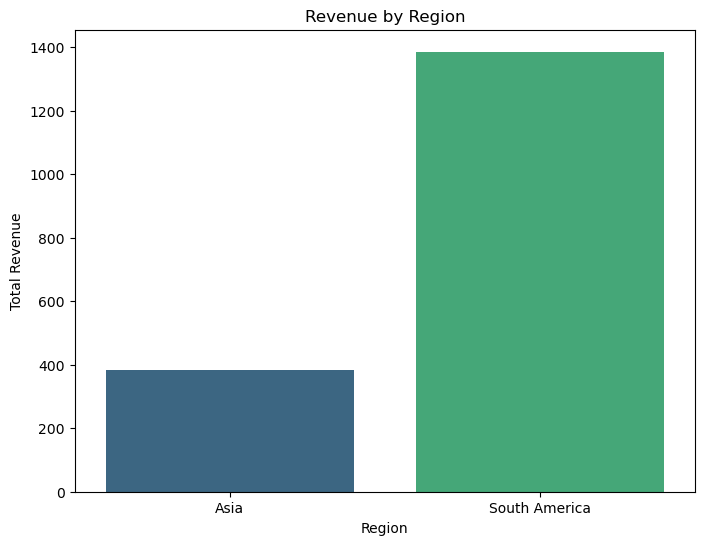

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='viridis')
plt.title('Revenue by Region')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.show()


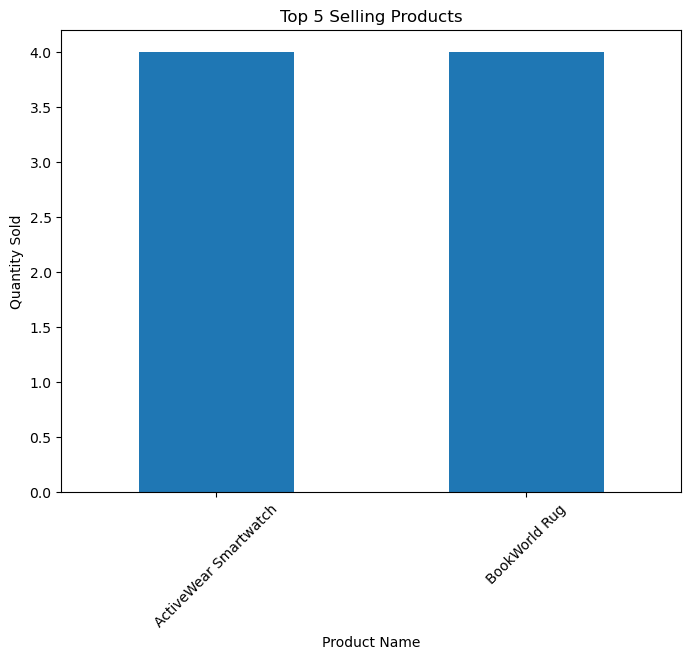

In [17]:
plt.figure(figsize=(8, 6))
top_products.head(5).plot(kind='bar', title='Top 5 Selling Products')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

# Insights

In [23]:
insights = [
    "1. Top-Selling Product: The product ActiveWear Smartwatch is the top seller by quantity. Focused promotions and marketing around this product could further boost sales.",
    "2. High Revenue Regions: Asia and South America generate the highest revenue. Business efforts should prioritize these regions for marketing and product availability.",
    "3. Growing Sales Trends: A clear upward trend in monthly sales indicates consistent business growth. This could be attributed to new customer acquisitions or seasonal demands.",
    "4. Popular Categories:Electronics dominates in sales, with Smartwatches and Headphones being consistent top performers. Future inventory and marketing strategies should reflect this demand.",
    "5. Customer Acquisition Success: Customers who recently signed up contribute significantly to revenue, highlighting successful acquisition strategies. Retention efforts should now focus on these newer customers." 
]

# Printing insights

In [24]:
print("\nBusiness Insights:")
for insight in insights:
    print(insight)


Business Insights:
1. Top-Selling Product: The product ActiveWear Smartwatch is the top seller by quantity. Focused promotions and marketing around this product could further boost sales.
2. High Revenue Regions: Asia and South America generate the highest revenue. Business efforts should prioritize these regions for marketing and product availability.
3. Growing Sales Trends: A clear upward trend in monthly sales indicates consistent business growth. This could be attributed to new customer acquisitions or seasonal demands.
4. Popular Categories:Electronics dominates in sales, with Smartwatches and Headphones being consistent top performers. Future inventory and marketing strategies should reflect this demand.
5. Customer Acquisition Success: Customers who recently signed up contribute significantly to revenue, highlighting successful acquisition strategies. Retention efforts should now focus on these newer customers.
